In [10]:
# All the necesarry libraries
import pandas as pd
import zipfile
import os
import random
import torch
from ultralytics import YOLOWorld
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision import models
from IPython.display import display
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [ ]:
# Define paths
root_dir = '/home/catalin/proiect/welding_dataset'
v1_dir = os.path.join(root_dir, 'The Welding Defect Dataset/The Welding Defect Dataset')

Displaying some training images from version 1:


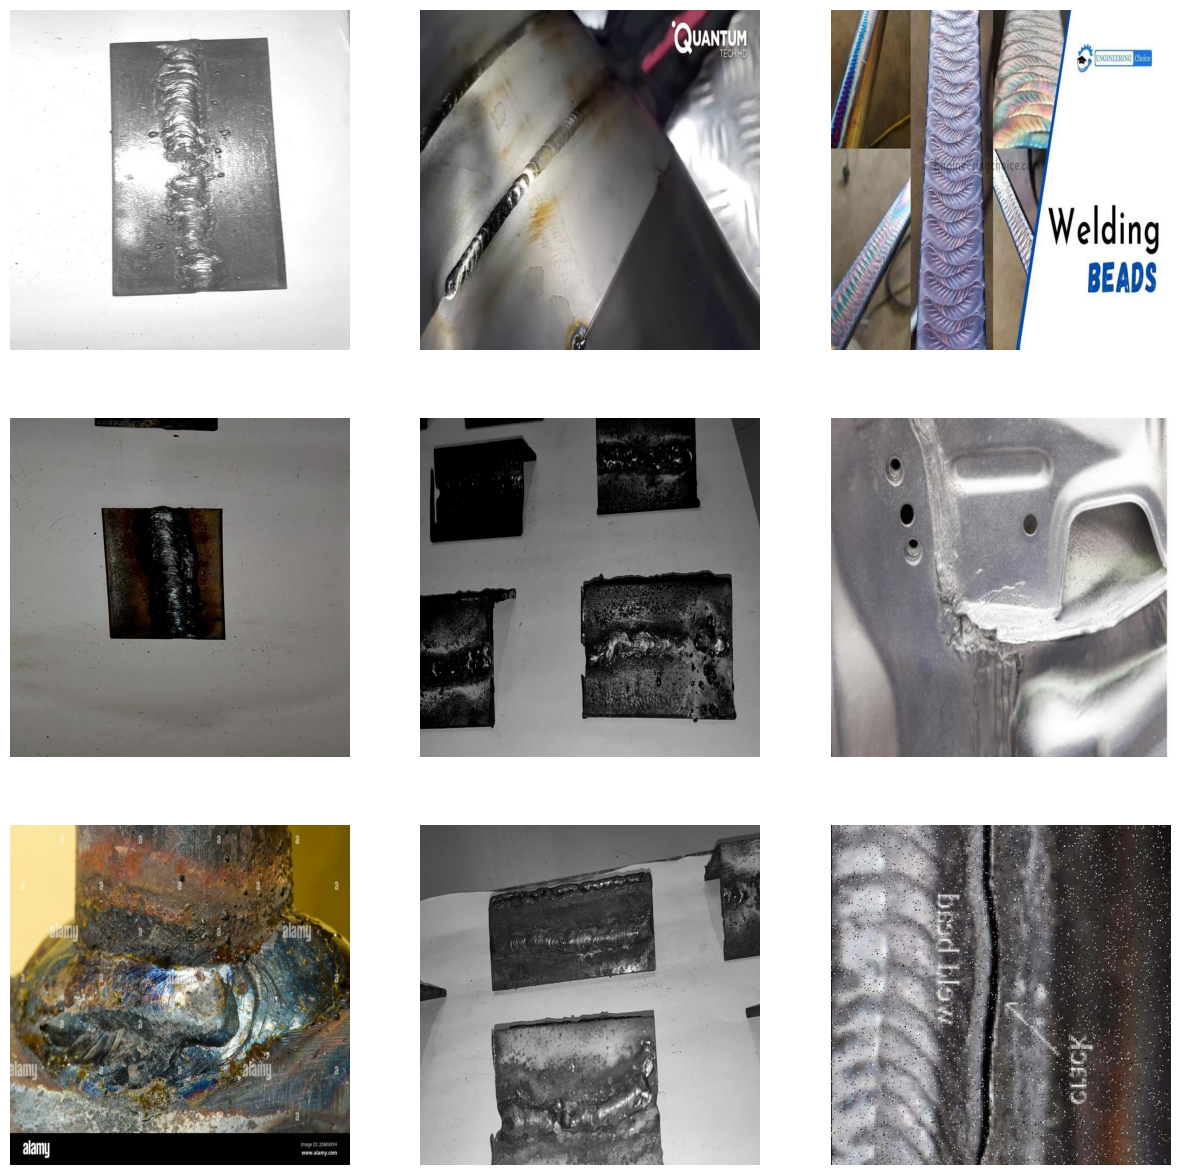

In [12]:
# Function to display images, modify num_images to show how much images you want
def display_images(image_dir, num_images=9):
    images = os.listdir(image_dir)
    sample_images = random.sample(images, num_images)
    plt.figure(figsize=(15, 15))
    for i, image_name in enumerate(sample_images):
        image_path = os.path.join(image_dir, image_name)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

# Display some training images
print("Displaying some training images from version 1:")
display_images(os.path.join(v1_dir, 'train/images'))

In [29]:
def update_data_yaml(data_yaml_path, base_dir):

    data_yaml_path = os.path.expanduser(data_yaml_path)
    base_dir = os.path.expanduser(base_dir)
    
    # Read file data.yaml
    with open(data_yaml_path, 'r') as file:
        data_yaml = file.read()
    
    # update file paths
    data_yaml = data_yaml.replace('../train/images', os.path.join(base_dir, 'train/images'))
    data_yaml = data_yaml.replace('../valid/images', os.path.join(base_dir, 'valid/images'))
    data_yaml = data_yaml.replace('../test/images', os.path.join(base_dir, 'test/images'))
    
    # Write updates
    with open(data_yaml_path, 'w') as file:
        file.write(data_yaml)

# paths
data_yaml_path = '/home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml'
base_dir = '/home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset'

# Update file data.yaml
update_data_yaml(data_yaml_path, base_dir)

# Check results
def print_data_yaml(data_yaml_path):
    data_yaml_path = os.path.expanduser(data_yaml_path)
    with open(data_yaml_path, 'r') as file:
        print(file.read())

print("Updated data.yaml:")
print_data_yaml(data_yaml_path)


Updated data.yaml:
train: /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/images
val: /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/images
test: /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images

nc: 3
names: ['Bad Weld', 'Good Weld', 'Defect']




In [17]:
import gc
gc.collect()

37358

In [18]:
# EDA and Preprocessing
def load_labels(label_dir):
    label_files = os.listdir(label_dir)
    data = []
    for label_file in label_files:
        with open(os.path.join(label_dir, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                data.append([label_file, class_id, x_center, y_center, width, height])
    df = pd.DataFrame(data, columns=['file', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    return df

v1_train_labels = load_labels(os.path.join(v1_dir, 'train/labels'))

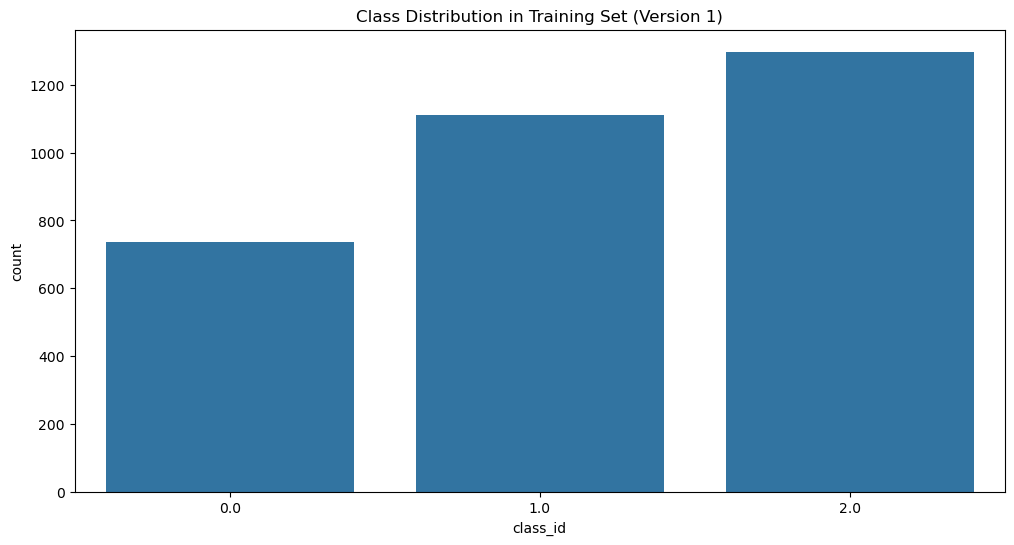

In [19]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=v1_train_labels, x='class_id')
plt.title('Class Distribution in Training Set (Version 1)')
plt.show()

In [20]:
# Initialize the model
model_v1 = YOLOWorld("/home/catalin/proiect/yolov8l-world.pt")

100%|██████████| 91.2M/91.2M [00:03<00:00, 26.2MB/s]


In [22]:
# Train model on version 1 dataset
model_v1.train(data='/home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml', epochs=100, imgsz=640, batch=16, name='welding_v1_aug', 
               lr0=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1,
               box=0.05, cls=0.5, iou=0.2, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, translate=0.1, scale=0.5, mosaic=1.0, mixup=0.5)


New https://pypi.org/project/ultralytics/8.3.43 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.38 🚀 Python-3.10.15 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24188MiB)
engine/trainer: task=detect, mode=train, model=/home/catalin/proiect/yolov8l-world.pt, data=/home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=welding_v1_aug2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.2, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False,

train: Scanning /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/labels... 839 images, 0 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<00:00, 956.03it/s] 

train: New cache created: /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/train/labels.cache



val: Scanning /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/labels... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 2649.64it/s]

val: New cache created: /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/valid/labels.cache


Plotting labels to runs/detect/welding_v1_aug2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 104 weight(decay=0.0), 122 weight(decay=0.0005), 128 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/welding_v1_aug2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/100      11.9G    0.01502      3.043      2.078         65        640: 100%|██████████| 53/53 [00:09<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.15it/s]

                   all        176        573      0.318       0.24      0.224      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      2/100      11.9G    0.01269      2.218      1.679         78        640: 100%|██████████| 53/53 [00:09<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        176        573     0.0425     0.0907     0.0439     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      3/100      11.8G     0.0126       2.13      1.652         67        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]

                   all        176        573     0.0233      0.105     0.0293     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      4/100        12G     0.0126      2.071      1.641         80        640: 100%|██████████| 53/53 [00:09<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.75it/s]

                   all        176        573      0.287      0.189      0.133     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      5/100        12G    0.01257      2.085      1.645         56        640: 100%|██████████| 53/53 [00:09<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.78it/s]

                   all        176        573      0.392       0.44      0.347       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      6/100      11.8G    0.01212      2.003      1.608         32        640: 100%|██████████| 53/53 [00:09<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.87it/s]

                   all        176        573      0.199       0.47       0.24      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      7/100      12.1G    0.01202      1.946      1.583         63        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.85it/s]

                   all        176        573      0.402      0.298        0.3      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      8/100        12G     0.0118       1.92      1.577         58        640: 100%|██████████| 53/53 [00:09<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.62it/s]

                   all        176        573      0.399      0.425      0.324      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      9/100        12G      0.012      1.933      1.579         75        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.64it/s]

                   all        176        573      0.399      0.387      0.325      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     10/100      11.9G    0.01161      1.854      1.561         62        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.34it/s]


                   all        176        573       0.44      0.473      0.384      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     11/100      12.1G     0.0114      1.753      1.522         73        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]

                   all        176        573      0.433      0.417      0.386      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     12/100        12G    0.01158      1.764      1.561         53        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.25it/s]


                   all        176        573      0.654      0.426      0.441      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     13/100        12G    0.01158      1.758      1.553         49        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.51it/s]

                   all        176        573      0.494      0.478      0.451      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     14/100      11.8G    0.01132      1.735      1.542         71        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]

                   all        176        573      0.446      0.546      0.413      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     15/100      12.1G    0.01144      1.747      1.542         52        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.60it/s]

                   all        176        573      0.438      0.452      0.356      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     16/100        12G    0.01132      1.696      1.528         65        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]

                   all        176        573      0.512      0.472      0.411      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     17/100        12G    0.01099      1.615      1.506         75        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all        176        573      0.415      0.504       0.39      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     18/100      11.9G    0.01121      1.668       1.52         32        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]

                   all        176        573      0.436      0.477      0.418       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     19/100      12.2G     0.0111      1.633      1.505         42        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]

                   all        176        573      0.493      0.457      0.437      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     20/100        12G    0.01111      1.644      1.515         69        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]

                   all        176        573       0.46      0.521      0.456       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     21/100        12G    0.01075      1.572      1.468         67        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        176        573       0.46      0.544      0.452      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     22/100      11.8G     0.0107      1.556      1.451         54        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]

                   all        176        573      0.527      0.524       0.48      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     23/100      12.1G    0.01066       1.53      1.468        108        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]

                   all        176        573      0.519      0.557      0.493      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     24/100        12G    0.01062      1.491      1.462         76        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.59it/s]

                   all        176        573      0.496      0.579      0.492      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     25/100        12G    0.01061      1.478      1.449         60        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]

                   all        176        573      0.563      0.547      0.509      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     26/100      11.8G    0.01052      1.456      1.454         88        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.68it/s]

                   all        176        573      0.479      0.476      0.452      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     27/100        12G    0.01031      1.442      1.411         46        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.37it/s]

                   all        176        573      0.511      0.555        0.5      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     28/100        12G    0.01051       1.46      1.438         53        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.29it/s]

                   all        176        573      0.529      0.499      0.446      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     29/100        12G    0.01029      1.423      1.427         42        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]

                   all        176        573      0.589      0.562      0.539      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     30/100      11.8G    0.01042      1.413      1.439         45        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.59it/s]

                   all        176        573      0.486      0.551      0.468      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     31/100        12G    0.01012       1.41      1.411        104        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.73it/s]

                   all        176        573      0.536      0.594      0.545      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     32/100        12G    0.01021      1.376      1.404         58        640: 100%|██████████| 53/53 [00:09<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        176        573      0.573      0.567       0.54      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     33/100        12G    0.01008      1.354      1.404         79        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]

                   all        176        573      0.584      0.553      0.543      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     34/100      11.8G   0.009963      1.359      1.391         46        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]

                   all        176        573      0.571      0.524       0.52      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     35/100      12.1G    0.01002       1.34      1.423         68        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.55it/s]

                   all        176        573      0.604      0.555      0.564       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     36/100        12G   0.009873      1.329      1.395         47        640: 100%|██████████| 53/53 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all        176        573      0.587      0.589      0.568      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     37/100        12G   0.009636      1.222      1.357         63        640: 100%|██████████| 53/53 [00:11<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.38it/s]

                   all        176        573      0.611      0.573      0.585      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     38/100      11.8G   0.009647      1.255      1.378         86        640: 100%|██████████| 53/53 [00:10<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.17it/s]

                   all        176        573      0.568       0.57      0.545      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     39/100      12.1G   0.009702      1.285      1.381         31        640: 100%|██████████| 53/53 [00:09<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.76it/s]

                   all        176        573      0.581      0.595      0.566      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     40/100        12G   0.009818      1.288      1.381         71        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.54it/s]

                   all        176        573      0.558      0.564      0.544      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     41/100        12G   0.009756      1.264      1.385        106        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.79it/s]

                   all        176        573      0.556      0.578      0.535      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     42/100      11.8G   0.009561      1.231      1.348         58        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.82it/s]

                   all        176        573      0.618      0.586      0.581      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     43/100      12.1G   0.009384      1.197      1.343         29        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.82it/s]

                   all        176        573      0.643      0.563      0.595      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     44/100        12G   0.009292      1.168      1.344         54        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]

                   all        176        573      0.617      0.603       0.59      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     45/100        12G   0.009613      1.242      1.365         73        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.63it/s]

                   all        176        573      0.617      0.552      0.553      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     46/100      12.2G   0.009545      1.232      1.364         70        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.63it/s]

                   all        176        573      0.656      0.564      0.571      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     47/100      12.1G   0.009373       1.16      1.351         41        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        176        573      0.623      0.608      0.598      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     48/100        12G   0.009185      1.141      1.323         76        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.69it/s]

                   all        176        573      0.662      0.586      0.579      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     49/100        12G   0.009359      1.166      1.338         40        640: 100%|██████████| 53/53 [00:10<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.57it/s]

                   all        176        573      0.636      0.588      0.575      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     50/100      11.8G   0.009184      1.137      1.322         74        640: 100%|██████████| 53/53 [00:09<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.65it/s]

                   all        176        573      0.596      0.618      0.582      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     51/100      12.1G   0.009238       1.13      1.333         60        640: 100%|██████████| 53/53 [00:10<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.46it/s]

                   all        176        573      0.615      0.589      0.588      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     52/100        12G    0.00903        1.1      1.316         54        640: 100%|██████████| 53/53 [00:09<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all        176        573       0.67       0.61       0.62      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     53/100        12G   0.009068      1.117      1.324        107        640: 100%|██████████| 53/53 [00:09<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]

                   all        176        573      0.613      0.611      0.605      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     54/100      11.8G   0.008978      1.093      1.299         61        640: 100%|██████████| 53/53 [00:09<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.77it/s]

                   all        176        573      0.643      0.623      0.611      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     55/100        12G    0.00876      1.072      1.293         60        640: 100%|██████████| 53/53 [00:10<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.44it/s]

                   all        176        573       0.65      0.614      0.614      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     56/100        12G    0.00887      1.067      1.302         75        640: 100%|██████████| 53/53 [00:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]

                   all        176        573      0.673      0.626      0.623       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     57/100        12G   0.008805      1.055      1.305         40        640: 100%|██████████| 53/53 [00:11<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.32it/s]

                   all        176        573      0.667      0.563      0.602      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     58/100      11.8G     0.0087      1.034      1.285         69        640: 100%|██████████| 53/53 [00:11<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.35it/s]

                   all        176        573      0.666      0.595      0.606      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     59/100      12.1G   0.008719      1.037      1.282         68        640: 100%|██████████| 53/53 [00:11<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.31it/s]

                   all        176        573      0.637      0.611      0.627      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     60/100        12G   0.008727      1.032      1.285         72        640: 100%|██████████| 53/53 [00:11<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.34it/s]

                   all        176        573      0.681      0.608      0.639      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     61/100        12G   0.008516      1.003      1.273         52        640: 100%|██████████| 53/53 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.14it/s]

                   all        176        573      0.665      0.608      0.631      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     62/100      11.8G   0.008483     0.9969      1.261         25        640: 100%|██████████| 53/53 [00:11<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        176        573      0.643      0.638      0.611       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     63/100      12.1G   0.008399     0.9896      1.259        107        640: 100%|██████████| 53/53 [00:11<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all        176        573      0.655      0.586      0.594      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     64/100        12G   0.008647      1.018      1.275         47        640: 100%|██████████| 53/53 [00:11<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]

                   all        176        573      0.678      0.603      0.621      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     65/100        12G   0.008267     0.9649      1.242         40        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]

                   all        176        573      0.642       0.64      0.638      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     66/100      11.9G   0.008105     0.9369      1.239         49        640: 100%|██████████| 53/53 [00:10<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.49it/s]

                   all        176        573      0.629      0.652      0.628      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     67/100      12.2G   0.008199     0.9541       1.24         20        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]

                   all        176        573       0.65      0.621      0.627      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     68/100        12G    0.00811     0.9343      1.233         73        640: 100%|██████████| 53/53 [00:10<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.81it/s]

                   all        176        573      0.637      0.586       0.61      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     69/100        12G   0.008139     0.9158      1.221         60        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]

                   all        176        573      0.645      0.623      0.628       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     70/100      11.9G   0.008197     0.9437      1.235         93        640: 100%|██████████| 53/53 [00:09<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.80it/s]

                   all        176        573      0.648      0.659      0.641      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     71/100        12G   0.008048     0.9263       1.23         48        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.648      0.641      0.634       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     72/100        12G   0.008083     0.9136      1.229         58        640: 100%|██████████| 53/53 [00:11<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.64it/s]

                   all        176        573      0.725      0.603       0.63      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     73/100        12G   0.008063     0.9069      1.218         88        640: 100%|██████████| 53/53 [00:10<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.52it/s]

                   all        176        573      0.662      0.622      0.613      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     74/100      11.8G   0.008062     0.9123       1.22         71        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.65it/s]

                   all        176        573      0.641       0.62      0.623      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     75/100      12.1G   0.007884     0.8824      1.201         61        640: 100%|██████████| 53/53 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.73it/s]

                   all        176        573      0.633      0.625       0.63      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     76/100        12G   0.007977     0.9045      1.214         35        640: 100%|██████████| 53/53 [00:10<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.79it/s]

                   all        176        573      0.682      0.616      0.636      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     77/100        12G   0.007833     0.8651      1.206         78        640: 100%|██████████| 53/53 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]

                   all        176        573      0.685       0.61      0.629      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     78/100      11.9G   0.007791     0.8517      1.196         58        640: 100%|██████████| 53/53 [00:11<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.49it/s]

                   all        176        573      0.693      0.624      0.632      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     79/100      12.1G   0.007711     0.8504      1.191         36        640: 100%|██████████| 53/53 [00:11<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.63it/s]

                   all        176        573       0.68      0.615      0.625      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     80/100        12G   0.007688     0.8522      1.191         47        640: 100%|██████████| 53/53 [00:10<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.78it/s]

                   all        176        573      0.665      0.626      0.635      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     81/100        12G   0.007682     0.8648      1.201         81        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all        176        573      0.645       0.65      0.642      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     82/100      11.8G   0.007687     0.8576      1.191         53        640: 100%|██████████| 53/53 [00:10<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.669      0.597      0.626      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     83/100      12.1G   0.007587     0.8262      1.176        114        640: 100%|██████████| 53/53 [00:11<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        176        573      0.663      0.606      0.629      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     84/100        12G   0.007528     0.8265      1.182         58        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        176        573      0.648      0.634      0.622      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     85/100        12G   0.007515     0.8229      1.174         71        640: 100%|██████████| 53/53 [00:11<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.09it/s]

                   all        176        573      0.684      0.635      0.647      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     86/100      11.9G   0.007417     0.8056      1.166         74        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        176        573      0.657      0.636      0.644      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     87/100      12.1G   0.007273     0.7823      1.165         71        640: 100%|██████████| 53/53 [00:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        176        573      0.689      0.625      0.653      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     88/100        12G   0.007252     0.8012      1.156         71        640: 100%|██████████| 53/53 [00:10<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.27it/s]

                   all        176        573      0.646       0.67      0.655      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     89/100        12G   0.007277     0.7881      1.162         74        640: 100%|██████████| 53/53 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.93it/s]

                   all        176        573      0.647       0.66      0.658      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     90/100        12G   0.007262     0.7831      1.158         77        640: 100%|██████████| 53/53 [00:11<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]

                   all        176        573      0.645      0.666      0.656      0.402


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     91/100      12.1G   0.006275     0.5824      1.061         32        640: 100%|██████████| 53/53 [00:11<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.82it/s]

                   all        176        573      0.708      0.605      0.655      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     92/100        12G   0.006028     0.5494      1.048         21        640: 100%|██████████| 53/53 [00:10<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.92it/s]

                   all        176        573       0.69      0.625      0.657      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     93/100        12G   0.005903     0.5437      1.046          8        640: 100%|██████████| 53/53 [00:10<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.85it/s]

                   all        176        573      0.713      0.611       0.66      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     94/100      11.8G   0.005781      0.528      1.036         17        640: 100%|██████████| 53/53 [00:10<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.97it/s]

                   all        176        573      0.699      0.629       0.67      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     95/100      12.1G    0.00565     0.5109      1.031         33        640: 100%|██████████| 53/53 [00:11<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.15it/s]

                   all        176        573      0.705      0.641      0.662      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     96/100        12G   0.005677     0.5088      1.031         36        640: 100%|██████████| 53/53 [00:10<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.96it/s]

                   all        176        573       0.69      0.648      0.651      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     97/100        12G   0.005585     0.4996      1.022         37        640: 100%|██████████| 53/53 [00:10<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.06it/s]

                   all        176        573      0.685      0.641      0.661      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     98/100      11.8G   0.005593     0.5083      1.028         22        640: 100%|██████████| 53/53 [00:11<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.99it/s]

                   all        176        573      0.692      0.635      0.655       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     99/100      12.1G     0.0054     0.4901      1.006         27        640: 100%|██████████| 53/53 [00:10<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        176        573      0.712      0.627       0.66       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/53 [00:00<?, ?it/s]/home/catalin/.conda/envs/yolo/lib/python3.10/site-packages/torch/autograd/graph.py:825: UserWarning: adaptive_max_pool2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647382455/work/aten/src/ATen/Context.cpp:91.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    100/100        12G   0.005396     0.4848      1.005         25        640: 100%|██████████| 53/53 [00:10<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.83it/s]

                   all        176        573      0.692      0.645      0.659      0.415



100 epochs completed in 0.328 hours.
Optimizer stripped from runs/detect/welding_v1_aug2/weights/last.pt, 95.5MB
Optimizer stripped from runs/detect/welding_v1_aug2/weights/best.pt, 95.5MB

Validating runs/detect/welding_v1_aug2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.15 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4090, 24188MiB)
YOLOv8l-world summary (fused): 311 layers, 47,529,842 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]


                   all        176        573      0.699      0.629       0.67      0.413
              Bad Weld         87        127      0.721      0.733      0.793      0.525
             Good Weld        119        253      0.761      0.684      0.759       0.51
                Defect         90        193      0.615      0.472      0.458      0.204
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/welding_v1_aug2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x72e69ab44b50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

Displaying results from model trained on version 1 with augmentation:

image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV2_2_mp4-100_jpg.rf.95c9ff940b64d347919b6d49dfb8b0b3.jpg: 640x640 2 Bad Welds, 1 Good Weld, 2 Defects, 16.4ms
Speed: 1.3ms preprocess, 16.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


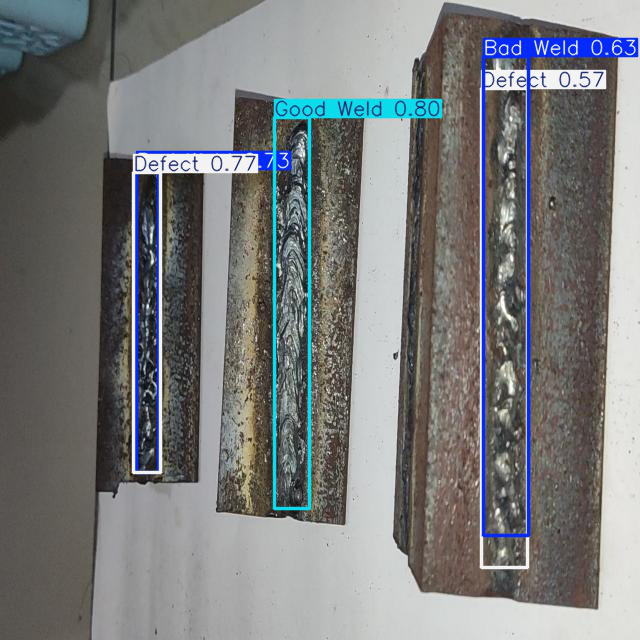


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_23_jpeg_jpg.rf.fdf50352e3c124ff6edab3e96257a040.jpg: 640x640 1 Good Weld, 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


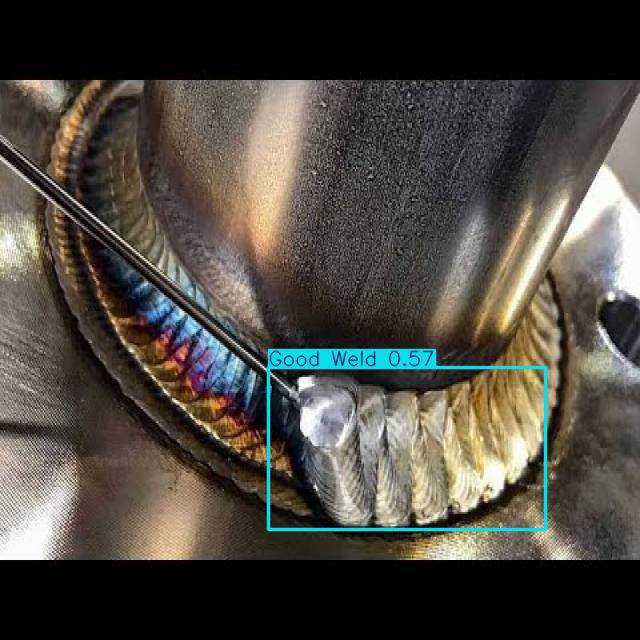


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV1_1_mp4-42_jpg.rf.6e68d9186e630ffb996233ad2a593f51.jpg: 640x640 2 Bad Welds, 2 Good Welds, 3 Defects, 14.6ms
Speed: 1.4ms preprocess, 14.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


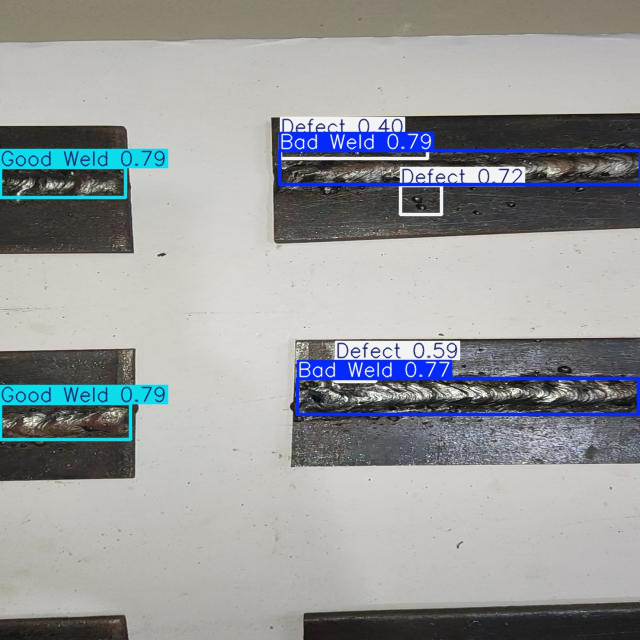


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid634_jpeg_jpg.rf.9b7bc6b6e69b54eb707c9bab8857b7a1.jpg: 640x640 1 Good Weld, 13.8ms
Speed: 1.3ms preprocess, 13.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


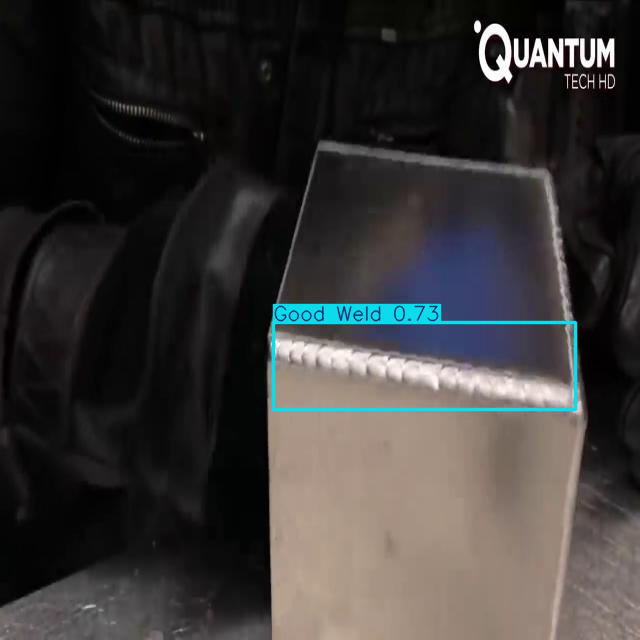


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/SampleV2_2_mp4-76_jpg.rf.492360f34b458a190c41d157fff3dbba.jpg: 640x640 1 Good Weld, 14.1ms
Speed: 1.5ms preprocess, 14.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


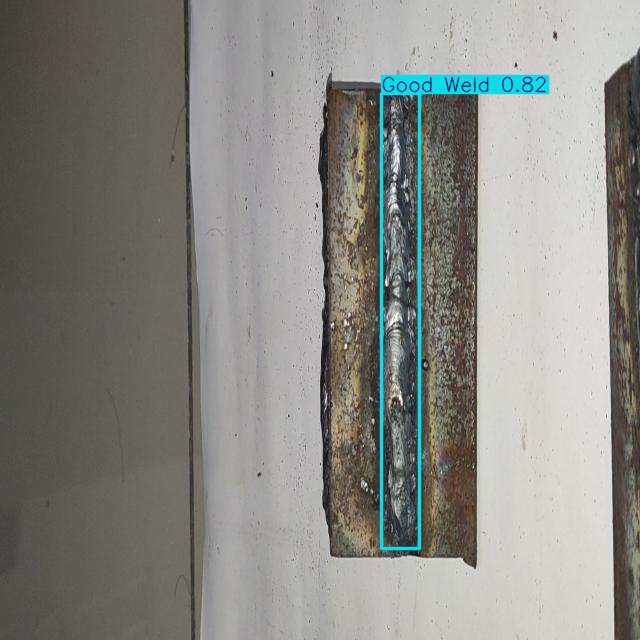


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid863_jpeg_jpg.rf.9e85aba7b2a24a1cd973afa34c9278c0.jpg: 640x640 1 Good Weld, 14.1ms
Speed: 1.4ms preprocess, 14.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


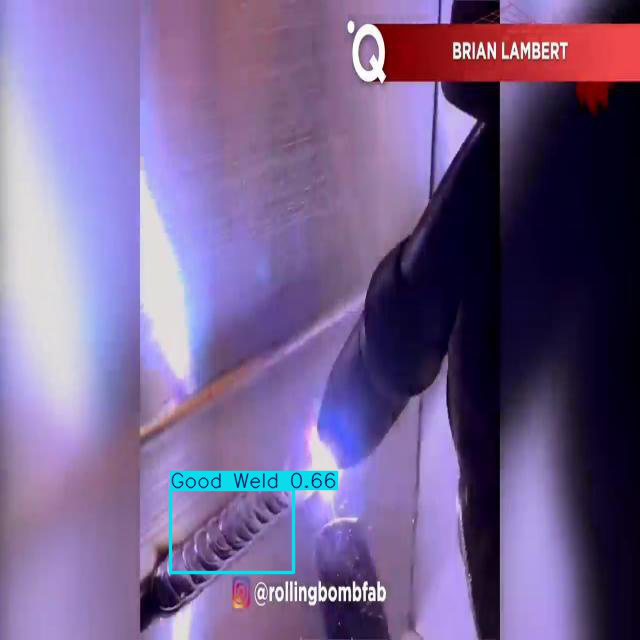


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid643_jpeg_jpg.rf.4198326c850625e57e8851f1da196032.jpg: 640x640 1 Bad Weld, 14.1ms
Speed: 1.4ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


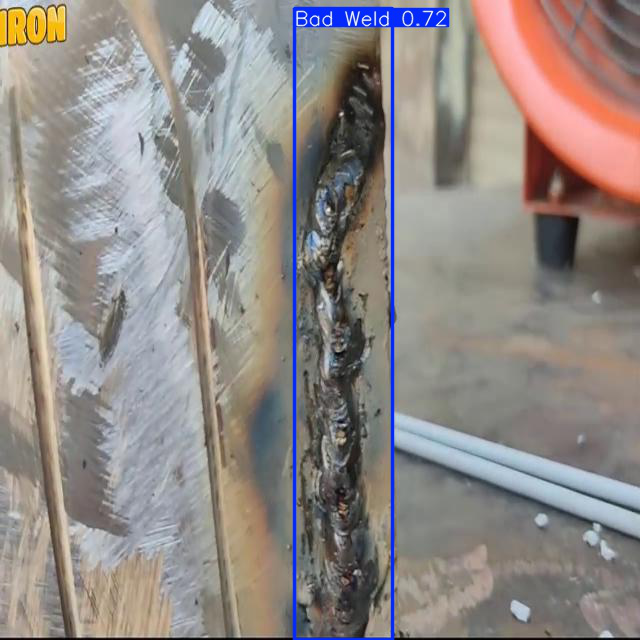


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/good_weld_vid1098_jpeg_jpg.rf.9237cce5d77a8a1c3a6dda6c976ca7d5.jpg: 640x640 (no detections), 14.3ms
Speed: 1.4ms preprocess, 14.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


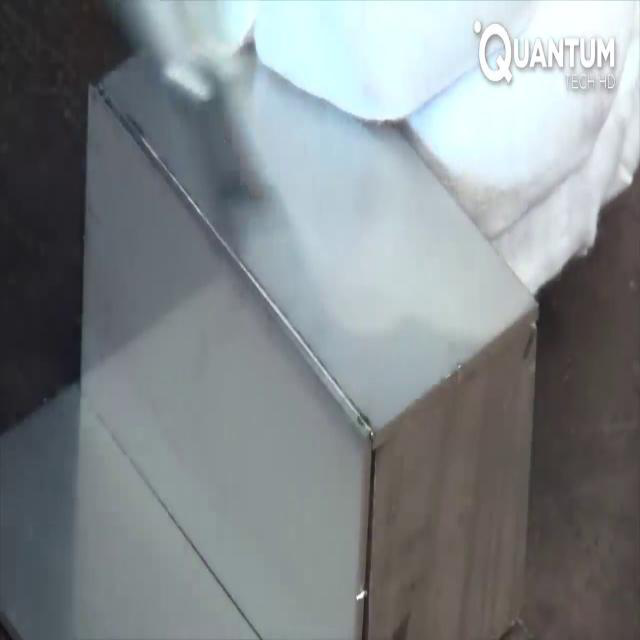


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/bad_weld_vid233_jpeg_jpg.rf.17d61563d86c4d1fc157c29f5a109d98.jpg: 640x640 (no detections), 21.3ms
Speed: 2.1ms preprocess, 21.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


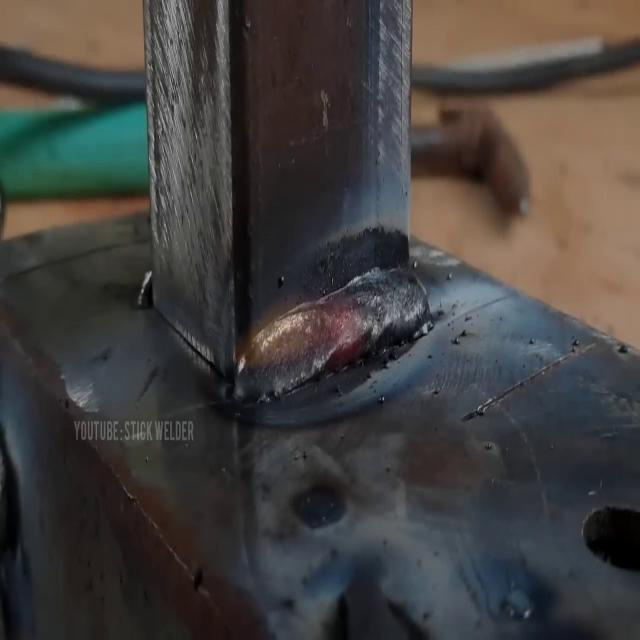


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/Good-Welding-images_33_jpeg_jpg.rf.782ccc0dfca926b946a6b664dd4cacd1.jpg: 640x640 1 Good Weld, 20.7ms
Speed: 1.9ms preprocess, 20.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


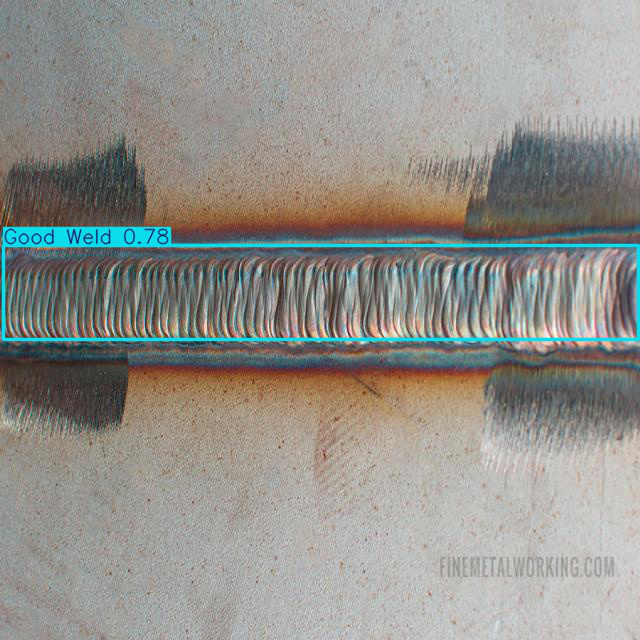


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/4a05306b-ca866e1f-c12_jpg.rf.c5c926823394e6056b533bedd6e64c99.jpg: 640x640 1 Bad Weld, 1 Good Weld, 21.1ms
Speed: 1.9ms preprocess, 21.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


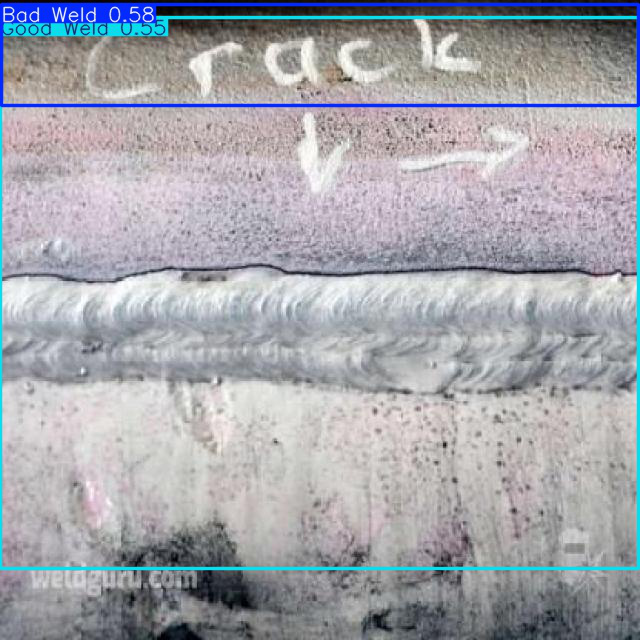


image 1/1 /home/catalin/proiect/welding_dataset/The Welding Defect Dataset/The Welding Defect Dataset/test/images/crack-welding-images_11_jpeg_jpg.rf.5174724ff08d893dc926840b5d3a3e22.jpg: 640x640 1 Bad Weld, 1 Defect, 21.0ms
Speed: 1.9ms preprocess, 21.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


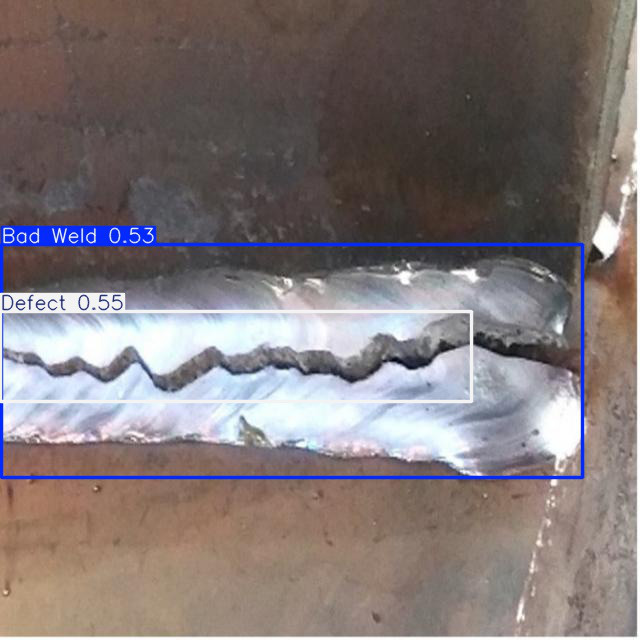

In [49]:
# Evaluate the model and display results
def display_results(model, img_dir, num_images=12):
    images = os.listdir(img_dir)
    sample_images = random.sample(images, num_images)
    save_dir = 'runs/detect/exp'
    os.makedirs(save_dir, exist_ok=True)
    
    for image_name in sample_images:
        image_path = os.path.join(img_dir, image_name)
        results = model(image_path)
        for result in results:
            result.plot(save=True, filename=os.path.join(save_dir, os.path.basename(result.path)))
            result_image_path = os.path.join(save_dir, os.path.basename(result.path))
            img = Image.open(result_image_path)
            display(img)

print("Displaying results from model trained on version 1 with augmentation:")
display_results(model_v1, os.path.join(v1_dir, 'test/images'))
